# Classification Trees

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error

In [4]:
# Predict high or low sales of carseats

In [5]:
df3 = pd.read_csv('Carseats.csv')
df3[:5]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
# ShelveLoc, Urban, US are categorical
# change the name of ShelveLoc to Shelve

In [7]:
df3.rename({'ShelveLoc':'Shelve'}, axis = 1, inplace = True)

In [8]:
# Create categorical response

In [9]:
df3['High'] = df3.Sales.map(lambda x: 1 if x>8 else 0)

In [10]:
df3.iloc[:5, -11:]

,CompPrice,Income,Advertising,Population,Price,Shelve,Age,Education,Urban,US,High
0,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,141,64,3,340,128,Bad,38,13,Yes,No,0


In [11]:
df4 = pd.get_dummies(df3, columns = ['Shelve','Urban','US'])
df4.iloc[:5,-11:]

,Price,Age,Education,High,Shelve_Bad,Shelve_Good,Shelve_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,120,42,17,1,1,0,0,0,1,0,1
1,83,65,10,1,0,1,0,0,1,0,1
2,80,59,12,1,0,0,1,0,1,0,1
3,97,55,14,0,0,0,1,0,1,0,1
4,128,38,13,0,1,0,0,0,1,1,0


In [12]:
df4 = df4.drop(['Shelve_Bad','Urban_No','US_No'], axis = 1,)
df4.iloc[:5,-11:]

,Income,Advertising,Population,Price,Age,Education,High,Shelve_Good,Shelve_Medium,Urban_Yes,US_Yes
0,73,11,276,120,42,17,1,0,0,1,1
1,48,16,260,83,65,10,1,1,0,1,1
2,35,10,269,80,59,12,1,0,1,1,1
3,100,4,466,97,55,14,0,0,1,1,1
4,64,3,340,128,38,13,0,0,0,1,0


In [13]:
X = df4.drop(['Sales','High'], axis = 1)
y = df4.High

# Validation Approach

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.5,
                                                   test_size = 0.5, random_state = 0)

In [15]:
classification_tree_carseats = DecisionTreeClassifier(max_depth = 6)
classification_tree_carseats.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [16]:
# train accuracy rate

In [17]:
classification_tree_carseats.score(X_train, y_train)

0.945

In [18]:
# test accuracy rate

In [19]:
pred = classification_tree_carseats.predict(X_test)

In [20]:
mat1 = confusion_matrix(y_test, pred)
mat1

array([[103,  15],
       [ 38,  44]], dtype=int64)

In [21]:
cm = pd.DataFrame(mat1, index = ['No','Yes'], columns = ['No','Yes'])
cm

,No,Yes
No,103,15
Yes,38,44


In [22]:
sum1 = cm.values.sum()

In [23]:
# accuracy rate
(103+44)/sum1

0.735

# K-fold Cross Validation on Classification Trees

In [24]:
kfold = KFold(n_splits = 10, random_state = 7)

In [25]:
tree_model = DecisionTreeClassifier(max_depth = 6)

In [26]:
result = cross_val_score(tree_model, X, y, cv = kfold)
result.mean()

0.705

# Bagging on Classification Trees

In [27]:
from sklearn.ensemble import BaggingClassifier

In [28]:
bag_model = BaggingClassifier(tree_model, n_estimators = 500, random_state = 0)

In [29]:
result = cross_val_score(bag_model, X, y, cv = kfold)
result.mean()

0.7874999999999999

# Regression Trees

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [31]:
boston_df = pd.read_csv('Boston.csv')
boston_df[:5]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [32]:
# predict median home value 'medv'

In [33]:
X = boston_df.drop('medv', axis = 1)
y = boston_df.medv

# Validation Approach

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.5,
                                                   test_size = 0.5, random_state = 0)

In [35]:
# when max_depth = 2
regr_tree_boston = DecisionTreeRegressor(max_depth = 2)
regr_tree_boston.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [36]:
pred = regr_tree_boston.predict(X_test)
mspe = mean_squared_error(y_test, pred)
mspe

28.80154486445795

In [37]:
np.sqrt(mspe)
# meaning the predictions are within $ 5,336.71 of the true median home value

5.366707078317015

In [38]:
# when max_depth = 4
regr_tree_boston = DecisionTreeRegressor(max_depth = 4)
regr_tree_boston.fit(X_train, y_train)
pred = regr_tree_boston.predict(X_test)
mspe = mean_squared_error(y_test, pred)
mspe

23.81737151382862

In [39]:
np.sqrt(mspe)
# increasing depth reduced test MSE

4.880304448887244

In [40]:
# plot (max_depth = 4)

In [41]:
xaxis = np.linspace(0, 50, 100)
yaxis = xaxis

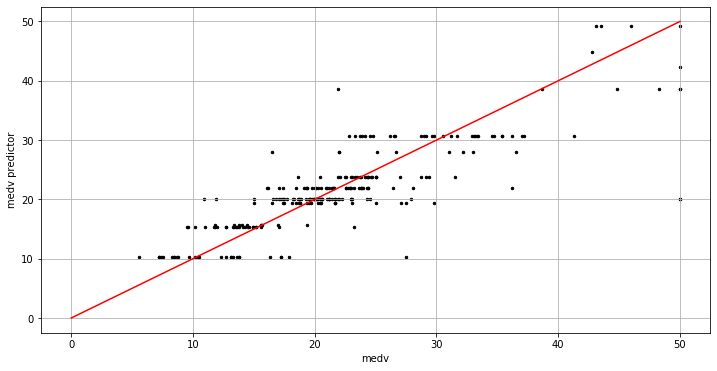

In [42]:
plt.figure(figsize = (12, 6))
plt.scatter(y_test, pred, s = 6, color = 'k')
plt.plot(xaxis, yaxis, color = 'r')
plt.xlabel('medv')
plt.ylabel('medv predictor')
plt.grid()

# K-fold Cross Validation on Regression Trees

In [43]:
kfold = KFold(n_splits = 10, random_state = 7)

In [44]:
model = DecisionTreeRegressor(max_depth = 5)

In [45]:
result = cross_val_score(model, X, y, cv = kfold, scoring = 'neg_mean_squared_error')

In [46]:
# test MSE
result.mean()

-32.5259525529908

# Bagging on Regression Trees

In [47]:
# all 13 predictors will be consideredat each split of the tree
# so, max_features m = # of predictors p

In [48]:
bagged_boston = RandomForestRegressor(max_features = 13, n_estimators = 500, random_state = 1)
bagged_boston.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=13, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [49]:
# test MSE

In [50]:
pred = bagged_boston.predict(X_test)

In [51]:
mean_squared_error(y_test, pred)

15.998707886640329

In [52]:
# value is significantly lower than that of a single tree

In [53]:
# reduce the number of trees from B = 500 to B = 25
bagged_boston = RandomForestRegressor(max_features = 13, n_estimators = 25, random_state = 1)
bagged_boston.fit(X_train, y_train)
pred = bagged_boston.predict(X_test)
mean_squared_error(y_test, pred)

17.376042687747038

In [54]:
# higher (worse) than the test MSE with 500 trees, but still better than single tree test MSE

# Random Forest on Regression Trees

In [55]:
# not all 13 predictors will be considered at each split
# max_features m < # of predictors p

In [56]:
# when m = 6
random_forest_boston = RandomForestRegressor(max_features = 6, n_estimators = 500, random_state = 1)
random_forest_boston.fit(X_train, y_train)
pred = random_forest_boston.predict(X_test)
mean_squared_error(y_test, pred)

15.657064488379476

In [57]:
# test MSE is slightly smaller (better) than bagging

# Importance of Each Predictor (Feature)

In [58]:
Importance = pd.DataFrame({'Importance': random_forest_boston.feature_importances_*100}, index = X.columns)
Importance

,Importance
crim,4.890381
zn,0.417102
indus,4.194304
chas,0.326955
nox,4.400022
rm,31.027284
age,2.734233
dis,5.021207
rad,0.579018
tax,2.290990


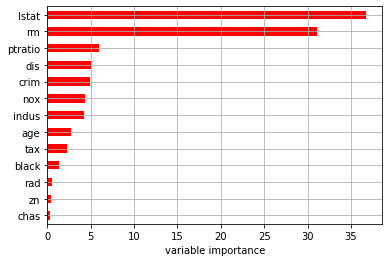

In [59]:
Importance.sort_values(by = 'Importance', axis = 0, ascending = True).plot(kind = 'barh', color = 'r')
plt.xlabel('variable importance')
plt.gca().legend_ = None
plt.grid()

In [60]:
# across all of the tree is the random forest
# the wealth level of the community ('lstat') and the house size ('rm')


# Boosting

In [61]:
from sklearn.ensemble import GradientBoostingRegressor

In [62]:
# limit the depth f the trees to 4 splits

In [63]:
boosted_boston = GradientBoostingRegressor(n_estimators = 500, learning_rate = 0.01, max_depth = 4, random_state = 1)
boosted_boston.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [64]:
importance = boosted_boston.feature_importances_*100

In [65]:
rel_imp = pd.DataFrame({'rel_imp': random_forest_boston.feature_importances_*100}, index = X.columns)
rel_imp

,rel_imp
crim,4.890381
zn,0.417102
indus,4.194304
chas,0.326955
nox,4.400022
rm,31.027284
age,2.734233
dis,5.021207
rad,0.579018
tax,2.290990


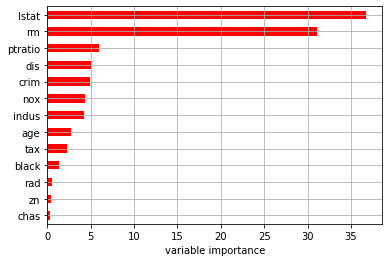

In [66]:
rel_imp.sort_values(by = 'rel_imp', axis = 0, ascending = True).plot(kind = 'barh', color = 'r')
plt.xlabel('variable importance')
plt.gca().legend_ = None
plt.grid()

In [67]:
# the wealth level of the community ('lstat') and the house size ('rm') are the two important features

In [68]:
# test MSE

In [69]:
mean_squared_error(y_test, boosted_boston.predict(X_test))

17.483377479729086

In [70]:
# test MSE is not as good as bagging nor random forest

In [71]:
# change the learning rate = 0.2
boosted_boston2 = boosted_boston = GradientBoostingRegressor(n_estimators = 500, learning_rate = 0.2, max_depth = 4, random_state = 1)
boosted_boston.fit(X_train, y_train)
mean_squared_error(y_test, boosted_boston2.predict(X_test))

17.26563113751168

In [72]:
# small improvement compare to learning rate = 0.01, but still worse than random forest